## 1. Proposal
### 노트북의 스펙을 통해 가격을 예측하는 모델을 만든다.
### 소비자가 노트북의 스펙에 합당한 가격으로 구매할 수 있도록 가이드라인을 제시한다.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/chung/Downloads/archive/Cleaned_Laptop_data.csv")

## 2. Datasets

In [3]:
#896개의 데이터, 변수는 23개
data.shape

(896, 23)

In [4]:
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [5]:
data.describe()

,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,1.198661,0.691964,76309.860491,88134.154018,18.527902,2.980469,367.391741,46.152902
std,2.057454,0.606282,46613.354368,55719.645554,10.508486,1.965254,1106.309355,136.079586
min,0.000000,0.000000,13990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,45490.000000,54940.500000,11.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,63494.000000,78052.500000,19.000000,4.100000,19.000000,3.000000
75%,2.000000,1.000000,89090.000000,111019.500000,26.000000,4.400000,179.500000,23.250000
max,8.000000,3.000000,441990.000000,377798.000000,57.000000,5.000000,15279.000000,1947.000000


In [6]:
#old_price 예측을 목적으로 한다.
data.drop('latest_price', axis=1, inplace = True)

In [7]:
#결측치 없음
data.isnull().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

In [8]:
data.brand.value_counts()

ASUS         254
DELL         154
Lenovo       148
HP           142
acer          58
MSI           52
APPLE         28
Avita         18
Vaio           5
LG             5
Nokia          4
ALIENWARE      4
realme         4
Infinix        4
lenovo         3
Smartron       3
MICROSOFT      3
RedmiBook      3
Mi             2
iball          1
SAMSUNG        1
Name: brand, dtype: int64

In [9]:
data.model.value_counts()

Missing     95
VivoBook    89
Inspiron    77
Pavilion    38
IdeaPad     37
            ..
B50-70       1
GE76         1
GP65         1
GP76         1
Thinkpad     1
Name: model, Length: 117, dtype: int64

In [10]:
data.ram_gb.value_counts()

8 GB GB     454
4 GB GB     259
16 GB GB    180
32 GB GB      3
Name: ram_gb, dtype: int64

In [11]:
data.os.value_counts()

Windows    832
DOS         36
Mac         28
Name: os, dtype: int64

## 3-1. 전처리

In [14]:
#독립변수(x), 종속변수(y) 구분
data_y = data.old_price
data.drop('old_price', axis=1, inplace=True)

#old_price(y)가 0인 행 버리기
data_y.value_counts()
data = data[data['old_price'] != 0]

AttributeError: 'DataFrame' object has no attribute 'old_price'

In [15]:
#범주형 변수, 수치형 변수 구분
data_types = data.dtypes
data_types

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb              object
ram_type            object
ssd                 object
hdd                 object
os                  object
os_bit              object
graphic_card_gb      int64
weight              object
display_size        object
warranty             int64
Touchscreen         object
msoffice            object
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

In [16]:
#수치형 변수이지만 Missing값 때문에 변수형으로 분리됨 -> Missing값 평균치로 대체
data.display_size.value_counts()

Missing    332
15.6       218
16         135
14         131
13.3        40
17.3         9
14.96        7
14.1         6
13           4
15           3
14.2         3
16.2         3
12.2         2
14.9         1
16.1         1
13.4         1
Name: display_size, dtype: int64

In [17]:
missing_indices = data['display_size'] == 'Missing'
mean_value = data.loc[~missing_indices, 'display_size'].astype(float).mean()
data.loc[missing_indices, 'display_size'] = mean_value

In [18]:
data.display_size.value_counts()

15.122021276595744    332
15.6                  218
16                    135
14                    131
13.3                   40
17.3                    9
14.96                   7
14.1                    6
13                      4
15                      3
14.2                    3
16.2                    3
12.2                    2
14.9                    1
16.1                    1
13.4                    1
Name: display_size, dtype: int64

In [19]:
data.display_size = data.display_size.astype(float)

In [20]:
#이제 진짜 범주형 변수, 수치형 변수 구분
data_types = data.dtypes
data_types

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb              object
ram_type            object
ssd                 object
hdd                 object
os                  object
os_bit              object
graphic_card_gb      int64
weight              object
display_size       float64
warranty             int64
Touchscreen         object
msoffice            object
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

In [21]:
numeric_vars = data_types[data_types != 'object'].index
categorical_vars = data_types[data_types == 'object'].index
data_encoded = pd.get_dummies(data, columns=categorical_vars)

In [22]:
data_encoded

,graphic_card_gb,display_size,warranty,discount,star_rating,ratings,reviews,brand_ALIENWARE,brand_APPLE,brand_ASUS,...,os_Windows,os_bit_32-bit,os_bit_64-bit,weight_Casual,weight_Gaming,weight_ThinNlight,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes
0,0,15.122021,0,23,3.7,63,12,0,0,0,...,1,0,1,0,0,1,1,0,1,0
1,0,15.122021,0,8,3.6,1894,256,0,0,0,...,1,0,1,1,0,0,1,0,1,0
2,0,15.122021,0,28,3.7,1153,159,0,0,0,...,1,0,1,0,0,1,1,0,1,0
3,0,15.122021,0,23,3.7,1153,159,0,0,0,...,1,0,1,0,0,1,1,0,1,0
4,0,15.122021,0,25,3.7,1657,234,0,0,0,...,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0,16.000000,1,25,0.0,0,0,0,0,1,...,1,0,1,1,0,0,1,0,1,0
892,4,15.122021,1,0,0.0,0,0,0,0,1,...,1,0,1,1,0,0,1,0,1,0
893,4,16.000000,1,0,0.0,0,0,0,0,1,...,1,0,1,1,0,0,1,0,1,0
894,0,15.122021,0,18,0.0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,1,0


## 3-2. 선형회귀모델

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [24]:
# 독립 변수(X)와 종속 변수(y) 분리
X = data_encoded
y = data_y

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트로 예측 수행
y_pred = model.predict(X_test)

## 4. 평가

In [43]:
y_test = y_test.values

In [68]:
y_test - y_pred

array([-7.90537500e+03,  2.69193750e+04, -3.00573750e+04,  1.90393750e+04,
       -5.47675000e+03, -4.88375000e+02, -8.90775000e+03,  1.21725000e+03,
        2.37282500e+04,  2.89650000e+03,  3.24500000e+03,  7.35750000e+02,
       -5.36500000e+02, -2.03065000e+04,  4.11863750e+04,  8.42312500e+03,
       -8.69950000e+03, -2.33982500e+04,  6.26236250e+04,  6.52300000e+03,
        9.73862500e+03, -1.27792500e+04,  2.51828750e+04, -2.89507500e+04,
        3.04436250e+04,  1.32011125e+05,  5.73500000e+03,  4.95925000e+04,
        9.08412500e+03,  7.59750000e+02, -2.43505000e+04,  1.63106250e+04,
       -3.21252500e+04, -2.67718750e+04, -1.29241250e+04, -6.72325000e+03,
       -3.51107905e+13, -2.77012500e+03,  3.46840394e+12, -1.13625000e+02,
        6.02375000e+02, -3.47010000e+04,  1.06572750e+05, -4.24157500e+04,
       -1.38551250e+04,  3.72758817e+12,  3.02900000e+03,  4.23041250e+04,
       -2.29935000e+04,  6.64212500e+03, -2.77030000e+04, -1.20837500e+03,
        3.95778069e+12, -

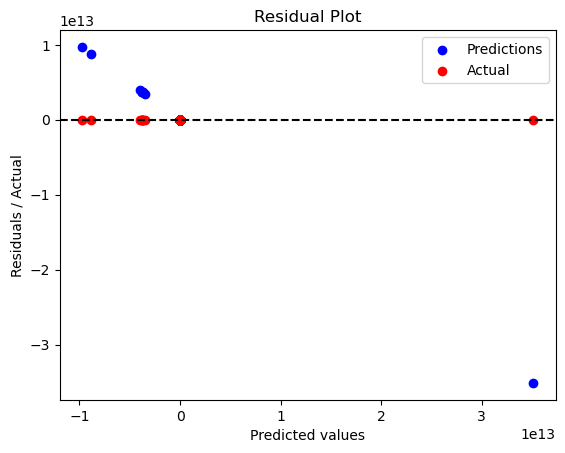

In [70]:
# 테스트 세트의 예측 오차 계산
residuals = y_test - y_pred

# 예측값과 실제값 산점도 그래프 생성
plt.scatter(y_pred, residuals, color='blue', label='Predictions')
plt.scatter(y_pred, y_test, color='red', label='Actual')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals / Actual')
plt.title('Residual Plot')
plt.legend()
plt.show()

In [65]:
array1 = np.abs(y_test - y_pred)

In [66]:
#이상치 제거
array2 = array1[array1 <= 1.0e+06]

In [67]:
#평가지표: MAE
np.mean(array2 / len(array2))

117.08451124567475

## 5. Related Works

### https://datascienceschool.net/03%20machine%20learning/04.02%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%98%20%EA%B8%B0%EC%B4%88.html
### https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-17-%ED%9A%8C%EA%B7%80-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C

## 6. 선형 회귀 분석을 통해 노트북 스펙에 대한 데이터로 노트북 가격을 예측하는 모델을 만들어 보았다. 예측값에 일부 이상치가 생겨 이를 제거하긴 했지만 변수와 데이터가 많지 않아 단순한 모델로도 꽤 괜찮은 결과를 얻을 수 있었다. 